# Lecture: intermediate `numpy`

## Topics covered

* Recap previous lecture
* Creating multi-dimensional arrays
* Accessing multi-dimensional arrays (slicing continued)
* Array operations
* Numpy array functions
    - Min and Max
    - Basic statistics
* Basic plotting



## Recap from previous lecture

To use numpy, we need to import it first:

In [9]:
import numpy as np

Arrays can be created explicitly:

In [10]:
a = np.array([[1, 2], [3, 4]])

print(a)

[[1 2]
 [3 4]]


They can also be created pre-populated with specific functions:

In [11]:
b = np.zeros((2, 2))

print(b)

[[0. 0.]
 [0. 0.]]


Arrays have a handful of data types (e.g.: integer, float):

In [12]:
print(a)
print(type(a[0,0]))

[[1 2]
 [3 4]]
<class 'numpy.int32'>


In [13]:
print(b)
print(type(b[0,0]))

[[0. 0.]
 [0. 0.]]
<class 'numpy.float64'>


And we need to be careful with these!


We can use `a[0,0] = 1` as an index for an array, because it is an integer.

In [14]:
c = np.arange(5)
print(c)

[0 1 2 3 4]


In [15]:
print(a[0,0])
c[a[0,0]]

1


1

But we cannot use `b[0,0] = 0.0` as an index for `c`, because it is a **float**

In [16]:
print(b[0,0])
c[b[0,0]]

0.0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

To avoid errors, it is a good practice to specify them, using `dtype=...`:

In [17]:
d = np.zeros((2,2), dtype=np.int32)

print(d)

[[0 0]
 [0 0]]


In [18]:
print(type(d[0,0]))

<class 'numpy.int32'>


In [19]:
print(d[0,0])
c[d[0,0]]

0


0

## Creating multi-dimensional arrays

There are a few ways of creating multi-dimensional arrays in numpy:
* Providing the data explicitly
* Reading a file (eg. csv)
* Built-in functions
    * `np.zeros`
    * `np.ones`
    * `np.full`
    * `np.random`


### Providing the data explicitly
This is what we have done before, converting a list of lists into an array. 
With three dimensions:

In [20]:
td = np.array([
              [[11,12], [13,14]],
              [[21,22], [23,24]],
              [[31,32], [33,34]]
              ])

print(td)

[[[11 12]
  [13 14]]

 [[21 22]
  [23 24]]

 [[31 32]
  [33 34]]]


Since this is a 3D matrix, we can access its contents with **three** indices, eg. `[0,1,1]`

In [21]:
td[0,1,1]

14

### Reading a file
It is done exactly as in the one-dimensional case. Let us consider the following CSV file:
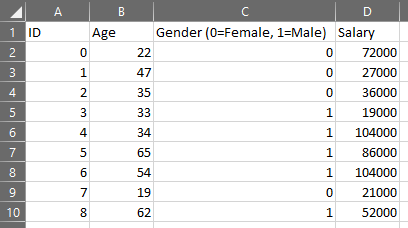

In [22]:
file_name = 'data/salaries.csv'
salary_data = np.genfromtxt(file_name, skip_header=1, delimiter=',')

**Tip:** The `shape` property tells you the shape of the data you have just read:

In [23]:
salary_data.shape

(9, 4)

In [24]:
print(salary_data)

[[0.00e+00 2.20e+01 0.00e+00 7.20e+04]
 [1.00e+00 4.70e+01 0.00e+00 2.70e+04]
 [2.00e+00 3.50e+01 0.00e+00 3.60e+04]
 [3.00e+00 3.30e+01 1.00e+00 1.90e+04]
 [4.00e+00 3.40e+01 1.00e+00 1.04e+05]
 [5.00e+00 6.50e+01 1.00e+00 8.60e+04]
 [6.00e+00 5.40e+01 1.00e+00 1.04e+05]
 [7.00e+00 1.90e+01 0.00e+00 2.10e+04]
 [8.00e+00 6.20e+01 1.00e+00 5.20e+04]]


#### Skipping rows and colums

We have seen how to skip rows at the top (skip_header). We can also skip columns.

For example, imagine that we have a file called `salaries_extended.csv` that looks that the one below; and we are only interested in `Age` and `Salary`:

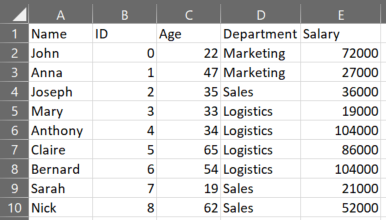



We can use the option `usecols` and specify a tuple with the columns we want to read. In this case, we want only columns `2` and `4`.
**Tip:** The index of the first column is `0`

In [25]:
ext_salary_data = np.genfromtxt('data/salaries_extended.csv', skip_header=1, delimiter=',', dtype=np.int32)
print(ext_salary_data)

[[    -1      0     22     -1  72000]
 [    -1      1     47     -1  27000]
 [    -1      2     35     -1  36000]
 [    -1      3     33     -1  19000]
 [    -1      4     34     -1 104000]
 [    -1      5     65     -1  86000]
 [    -1      6     54     -1 104000]
 [    -1      7     19     -1  21000]
 [    -1      8     62     -1  52000]]


In [26]:
ext_salary_data = np.genfromtxt('data/salaries_extended.csv', skip_header=1, usecols=(2,4), delimiter=',', dtype=np.int32)
print(ext_salary_data)

[[    22  72000]
 [    47  27000]
 [    35  36000]
 [    33  19000]
 [    34 104000]
 [    65  86000]
 [    54 104000]
 [    19  21000]
 [    62  52000]]


### Built-in functions
* `np.zeros` Creates an array full of zeros
* `np.ones` Creates an array full of ones
* `np.full` Creates an array full of whatever


Their syntax is similar, specify shape with a tuple (eg `(2,2)` for a 2 by 2 matrix) and optionally a type with `dtype`:

In [27]:
np.zeros((2,2), dtype=np.int32)

array([[0, 0],
       [0, 0]])

In [28]:
np.ones((2,2,2), dtype=np.float64)

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

With `np.full`, you need to specify what it should be full of as well:

In [29]:
np.full((3,5), -7, dtype=np.int32)

array([[-7, -7, -7, -7, -7],
       [-7, -7, -7, -7, -7],
       [-7, -7, -7, -7, -7]])

### Generating random numbers

There are a few functions that allow you to fill arrays with random numbers. They are stored in `np.random`
* `np.random.uniform` -> Uniform distribution
* `np.random.normal` -> Normal distribution
* `np.random.randint` -> Random integers
* Many others available, check the documentation!

Each needs to be provided with a shape and their own parameters:

For example, `randint` requires a "low" and a "high" integer. `low` might be included, but `high` is not:

In [30]:
np.random.randint(size=(3,3), low=3, high=10)

array([[3, 8, 5],
       [4, 9, 4],
       [7, 7, 9]])

In the `normal` distribution, `loc` is the keyword for the mean and `scale` is the keyword for the standard deviation:

In [31]:
np.random.normal(size=(2, 3, 3), loc=5, scale=3)

array([[[ 1.56102473,  4.4066944 ,  9.94043353],
        [ 2.00191752,  8.03796028,  8.31203351],
        [ 2.31329132,  4.54211438,  6.78181701]],

       [[11.62589207,  3.64292952,  3.68588771],
        [-0.34768209,  3.55542914,  5.0352781 ],
        [ 1.47468857,  2.4835907 ,  8.34514108]]])

## Accessing multi-dimensional arrays

A single element of a multi-dimensional array can be accessed simply by stating the position in square brackets, 
eg. the first element of a matrix can be accessed with `[0,0]`

In [32]:
a = np.array([[1, 2], [3, 4]], dtype=np.float64)
print(a)

a[0,0]

[[1. 2.]
 [3. 4.]]


1.0

If we only use one index, we would get a full row:

In [33]:
a[0] 

array([1., 2.])

This can also be done using slicing.


**Remember:** A slice is defined as `[start:end:step]`. Since we want a full row, we can use just `:`

In [34]:
a[0,:]

array([1., 2.])

Slices can also be used on multiple indices simultaneosly.

Recall the 3D matrix example:

In [35]:
td = np.array([
              [[11,12], [13,14]], 
              [[21,22], [23,24]],
              [[31,32], [33,34]]
              ])

In [36]:
# Meetoo question!
print(td)
slice = td[:,1,:]


[[[11 12]
  [13 14]]

 [[21 22]
  [23 24]]

 [[31 32]
  [33 34]]]


In [37]:
# Meetoo question!
# print('\nSlice [:,1,:] is:\n')
# print(slice)

# print('\nShape is {0}:'.format(slice.shape))

**Remember:** A slice is only a subset of an array. 

If we assign a slice to a variable and modify it, we are modifying the original array.

In [38]:
original = np.array([[1, 2], [3, 4], [5, 6]])
print('Original matrix:')
print(original)

Original matrix:
[[1 2]
 [3 4]
 [5 6]]


In [39]:
middle_row = original[1,:]
print('\nMiddle row: {0}'.format(middle_row))


Middle row: [3 4]


In [40]:
middle_row[0] = 0
print('Middle row modified: {0}'.format(middle_row))

Middle row modified: [0 4]


In [41]:
# This changed original!!!
print('\nAfter modifying the slice the original matrix becomes:')
print(original)


After modifying the slice the original matrix becomes:
[[1 2]
 [0 4]
 [5 6]]


This behaviour **also** occurs inside functions:

In [42]:
def zero_zero_to_seven(input_array):
    input_array[0,0] = 7

In [43]:
test_array = np.ones((5,5))

zero_zero_to_seven(test_array[1:2,:])

zero_zero_to_seven(test_array[3:,3:])

zero_zero_to_seven(test_array)

test_array

array([[7., 1., 1., 1., 1.],
       [7., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 7., 1.],
       [1., 1., 1., 1., 1.]])

**Warning** but this does not occur if the function **redefines** the matrix:

In [44]:
def array_times_seven(input_array):
    input_array = input_array*7

In [45]:
test_array = np.ones((5,5))

array_times_seven(test_array[3:,3:])

test_array

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [46]:
def array_times_seven_view(input_array):
    input_array[:,:] = input_array*7
    
test_array = np.ones((5,5))

array_times_seven_view(test_array[3:,3:])

test_array 

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 7., 7.],
       [1., 1., 1., 7., 7.]])

### Meetoo question

In [48]:
# Meetoo question!

def change_slice(arr):
    arr = arr*3
    arr[3:] = 0

arr = np.ones(5)

change_slice(arr)

# print(arr)


## Testing conditions on arrays

We can also test conditions on arrays. 
For example, let's check which salaries from the `salary_data` array are above 30k (recall the salary value is in the 4th column, index 3)

In [49]:
print(salary_data)

[[0.00e+00 2.20e+01 0.00e+00 7.20e+04]
 [1.00e+00 4.70e+01 0.00e+00 2.70e+04]
 [2.00e+00 3.50e+01 0.00e+00 3.60e+04]
 [3.00e+00 3.30e+01 1.00e+00 1.90e+04]
 [4.00e+00 3.40e+01 1.00e+00 1.04e+05]
 [5.00e+00 6.50e+01 1.00e+00 8.60e+04]
 [6.00e+00 5.40e+01 1.00e+00 1.04e+05]
 [7.00e+00 1.90e+01 0.00e+00 2.10e+04]
 [8.00e+00 6.20e+01 1.00e+00 5.20e+04]]


In [50]:
upper_salaries = salary_data[:,3] >= 30000
print(upper_salaries)

[ True False  True False  True  True  True False  True]


This tells us which rows verify our condition. But this kind of array can be used as index. 

Let's print now all the entries for these rows:

In [51]:
salary_data[upper_salaries]

array([[0.00e+00, 2.20e+01, 0.00e+00, 7.20e+04],
       [2.00e+00, 3.50e+01, 0.00e+00, 3.60e+04],
       [4.00e+00, 3.40e+01, 1.00e+00, 1.04e+05],
       [5.00e+00, 6.50e+01, 1.00e+00, 8.60e+04],
       [6.00e+00, 5.40e+01, 1.00e+00, 1.04e+05],
       [8.00e+00, 6.20e+01, 1.00e+00, 5.20e+04]])

In [52]:

print('IDs of employees with salary over 30k:')
salary_data[upper_salaries][:,0]

IDs of employees with salary over 30k:


array([0., 2., 4., 5., 6., 8.])

We can use this to calculate, for example, the average of these salaries:

In [53]:
np.mean(salary_data[upper_salaries][:,3]) 

75666.66666666667

If we want to know the mean of the salaries below 30k, we can just negate `upper_salaries` with the `~` operator:

In [54]:
print(upper_salaries)
print(~upper_salaries)

[ True False  True False  True  True  True False  True]
[False  True False  True False False False  True False]


In [55]:
np.mean(salary_data[~upper_salaries][:,3])

22333.333333333332

## Array operations
These operators are designed to work with `bool` arrays, i.e. the ones containing `True` or `False` values.

Let's take a look at the following logical functions and operators:
* Negation operator `~`
* And operator `&`
* Or operator `|`
* `np.all()` function
* `np.any()` function

In [56]:
# Let's create two boolean arrays, b1 and b2:
b1 = np.random.random((2, 4)) > 0.5
print('b1 =\n {0}'.format(b1))

b2 = np.random.random((2, 4)) > 0.5
print('\nb2 =\n {0}'.format(b2))

b1 =
 [[ True  True  True False]
 [ True  True False  True]]

b2 =
 [[ True  True False False]
 [False  True  True  True]]


In [57]:
print('\nAnd operator: b1 & b2 =\n {0}'.format(b1 & b2))


And operator: b1 & b2 =
 [[ True  True False False]
 [False  True False  True]]


In [58]:
print('\nOr operator: b1 | b2 =\n {0}'.format(b1 | b2))


Or operator: b1 | b2 =
 [[ True  True  True False]
 [ True  True  True  True]]


The functions `np.all()` and `np.any()` can be used to test whether all or any of the elements of a boolean array are `True`:

In [59]:
np.all(b1)

False

In [60]:
np.all(np.array([True, True, True]))

True

In [61]:
np.any(b1)

True

In [62]:
np.any(np.array([False, False, False]))

False

### Arithmetic
When talking about array arithmetic operations, we need to make a distinction. We say that operations are **element-wise**
when they involve single elements and that they are **matrix-wise** when they involve the array treated 
as a matrix.

When we write the usual operators `*`, `/`, `+`, `-` they will perform **element-wise** operations:

In [63]:
print(a)

[[1. 2.]
 [3. 4.]]


In [64]:
a*a

array([[ 1.,  4.],
       [ 9., 16.]])

In [65]:
a-a

array([[0., 0.],
       [0., 0.]])

These operations can also be performed with a scalar (a single number):

In [66]:
print(a)

[[1. 2.]
 [3. 4.]]


In [67]:
a*4

array([[ 4.,  8.],
       [12., 16.]])

In [68]:
1/a

array([[1.        , 0.5       ],
       [0.33333333, 0.25      ]])

Matrix multiplication has its own operator, `@`

In [69]:
a @ a

array([[ 7., 10.],
       [15., 22.]])

Similarly, dot product can be done with either `@` or `np.dot`

In [70]:
np.ones(2) @ np.ones(2)

2.0

In [71]:
np.dot(np.ones(2), np.ones(2))

2.0

Numpy has almost functions for any kind of matrix manipulation, for example:
* Transposing a matrix: `np.transpose`
* Inverse of a matrix: `np.linalg.inv`
* Determinant of a matrix: `np.linalg.det`

In [72]:
print('Original matrix =\n{0}'.format(a))
print('\nTransposed =\n{0}'.format(np.transpose(a)))
print('\nInverse =\n{0}'.format(np.linalg.inv(a)))
print('\nDeterminant = {0:.2f}'.format(np.linalg.det(a)))

Original matrix =
[[1. 2.]
 [3. 4.]]

Transposed =
[[1. 3.]
 [2. 4.]]

Inverse =
[[-2.   1. ]
 [ 1.5 -0.5]]

Determinant = -2.00


## Other numpy functions

Numpy offers a range of useful functions to deal with arrays. In Lecture 3 we have seen `np.sum`. 
This will also work for 2D arrays:

In [73]:
lsize = 100
large_array = np.random.random((lsize, lsize))
np.sum(large_array)

4935.748784125137

**Tip:** Remember that using `np.sum` (or any numpy function) is normally much faster than coding the same function yourself.

In [74]:
def my_sum(large_array):
    total_sum = 0
    for i in range(lsize):
        for j in range(lsize):
            total_sum += large_array[i,j]
    return(total_sum)

my_sum(large_array)

4935.74878412513

In [75]:
print('Numpy time:')
t1 = %timeit -o np.sum(large_array)

print('\nOur own time:')
t2 = %timeit -o my_sum(large_array)

print('\nThe average time of our function is {0:.0f} times slower than the average time of Numpy.'.format(t2.average/t1.average))


Numpy time:
5.96 µs ± 337 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Our own time:
2.02 ms ± 320 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

The average time of our function is 340 times slower than the average time of Numpy.


Other useful functions are the following:
* `np.max` get the maximum value of the array
* `np.min` get the minimum value of the array

In [76]:
print('The maximum value of large_array is {0:.8f}'.format(np.max(large_array)))

print('The minimum value of large_array is {0:.8f}'.format(np.min(large_array)))

The maximum value of large_array is 0.99987802
The minimum value of large_array is 0.00003001


Need something we have not mentioned? Numpy is likely to have it!
<img src="im/gsearch.png">

## Basic plotting
There are many alternatives for plotting in python, but the most popular to use with numpy is `matplotlib.pyplot`.

Let's import it in the usual way, calling it `plt`:


In [77]:
import matplotlib.pyplot as plt

Following with the salaries example, let's plot age against salary:

Recall the salary data:

In [78]:
print(salary_data)

[[0.00e+00 2.20e+01 0.00e+00 7.20e+04]
 [1.00e+00 4.70e+01 0.00e+00 2.70e+04]
 [2.00e+00 3.50e+01 0.00e+00 3.60e+04]
 [3.00e+00 3.30e+01 1.00e+00 1.90e+04]
 [4.00e+00 3.40e+01 1.00e+00 1.04e+05]
 [5.00e+00 6.50e+01 1.00e+00 8.60e+04]
 [6.00e+00 5.40e+01 1.00e+00 1.04e+05]
 [7.00e+00 1.90e+01 0.00e+00 2.10e+04]
 [8.00e+00 6.20e+01 1.00e+00 5.20e+04]]


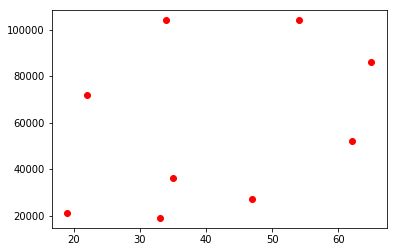

In [79]:
plt.plot(salary_data[:,1], salary_data[:,3], 'ro')

**Tip:** In this example, `'ro'` defines the style, the `r` stands for red and the `o` for circles

Equally simple would be to create a histogram of the salaries, using `hist`:

(array([3., 0., 1., 1., 0., 0., 1., 1., 0., 2.]),
 array([ 19000.,  27500.,  36000.,  44500.,  53000.,  61500.,  70000.,
         78500.,  87000.,  95500., 104000.]),
 <a list of 10 Patch objects>)

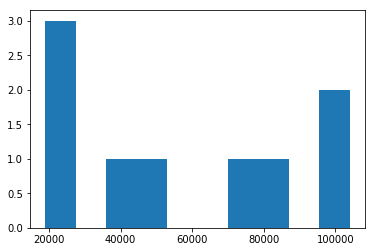

In [80]:
plt.hist(salary_data[:,3])

**Tip:** Here, a lot of features (for example the number of bins to use) have been defined automatically, but they can be tweaked. As usual, we can check this in the function help:

In [82]:
help(plt.hist)

**Line plots** If you want to plot a function, you can use the `plot` function. Let us plot `3x^2 + 4` with x values between 0 and 100

In [83]:
number_of_points = 100

In [84]:
x = np.linspace(0, 100, number_of_points)

In [85]:
y = 3*x**2 + 4

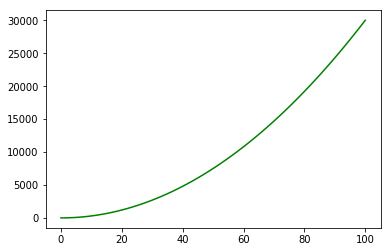

In [86]:
plt.plot(x,y, 'g-')

It is fairly easy to make plots "pretty" in matplotlib. We can add labels, title, legend...

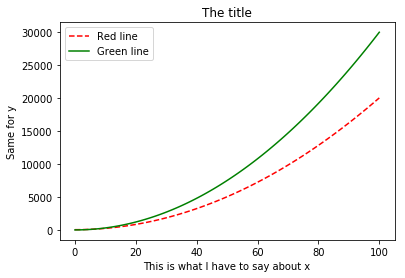

In [87]:
plt.title('The title')
plt.xlabel('This is what I have to say about x')
plt.ylabel('Same for y')

plt.plot(x,2*x**2 + 40, 'r--', label='Red line')
plt.plot(x,y, 'g-', label='Green line')
plt.legend()
plt.show()

**Tip:** in Jupyter notebooks the plots will just appear automatically, 
    but in regular scripts you need to call `plt.show()` to display the image, once you have added everything you want.

## Moving forward
* The possibilities of what you can do with matplotlib are endless, so the official documentation, books (like the one suggested in the course) and StackOverFlow are your friends
* **Remember all labs are tomorrow!** There is no lab on Friday, and no Drop-In session this week
* If you have a chance, try and have a go at the lab material before the class
* Assignment 2 deadline is around the corner!
* Next lecture we will walk you through writting a complete program to solve a problem
